# Mi primera regresión logística

## Importar librerías

In [16]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the digits dataset from scikit-learn.
digits = load_digits()

In [3]:
# El primer digito en nuestro data point
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# Le hacemos reshape en base a la documentacion
image = np.reshape(digits.data[0], (8, 8))

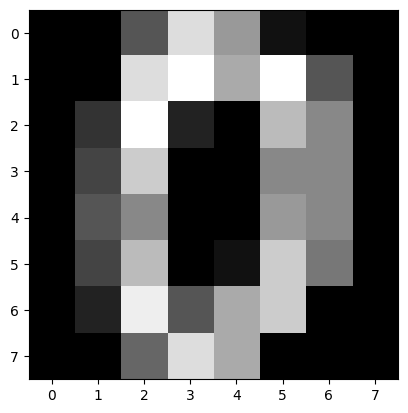

In [5]:
# Mostrar la imagen en matplotlib
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
# De esta manera podemos saber que digito es
# Variable objetivo a predecir en base a las imagenes
digits.target[0]

0

## Split de datos en **train y test**

In [7]:
# Separar el conjunto de datos en train y test

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

In [8]:
X_test.shape
# 360 -> filas
# 64 -> columnas

(360, 64)

## Entreamiento de modelo

In [9]:
model = LogisticRegression(max_iter=10000)

# Entretamiento sobre el conjunto de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Evaluación del modelo

In [10]:
# Tiene las predicciones de x_test
y_pred = model.predict(X_test)

In [15]:
model.score(X_test, y_test) * 100

95.83333333333334

In [11]:
cm = confusion_matrix(y_test, y_pred)

In [12]:
# Diagonal principal
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]])

## Visualizacion de nuestras predicciones

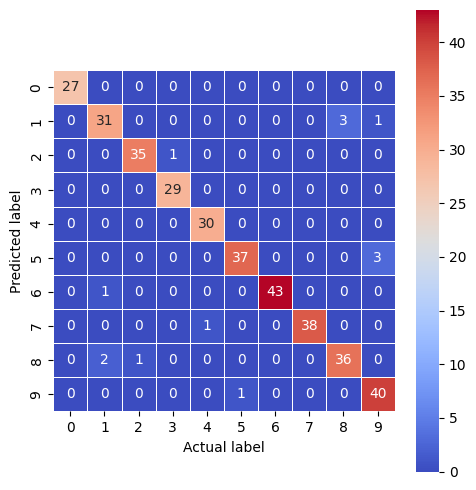

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, square=True, cmap='coolwarm')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.tight_layout()
plt.show()

## ESTANDARIZAR LOS DATOS

In [25]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc_x = StandardScaler().fit(X_train)
x_train_std = sc_x.transform(X_train)
x_test_std = sc_x.transform(X_test)


# Entrenar el modelo
model = LogisticRegression(max_iter=10000)

model.fit(x_train_std, y_train)

LogisticRegression(max_iter=10000)

In [26]:
y_pred = model.predict(x_test_std)

In [28]:
model.score(x_test_std, y_test) * 100

96.11111111111111

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

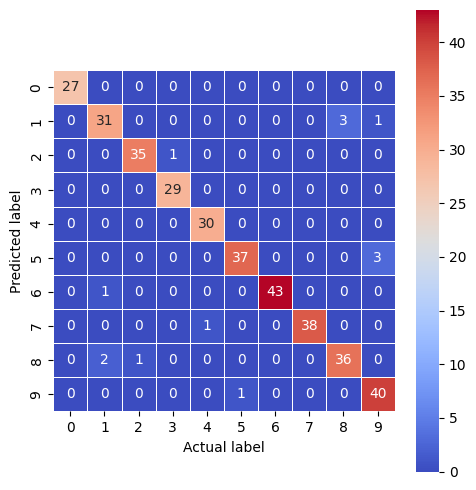

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, square=True, cmap='coolwarm')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.tight_layout()
plt.show()